In [66]:
from kudu_metrics_log import *
import glob
import numpy
import os
from matplotlib import pyplot as plt

In [67]:
EXPS_HOME = "/home/awong/8/kudu-experiments"

In [68]:
def cluster_metrics_for_workload(workload, cluster="**"):
    clusters_glob = glob.glob("{}/logs/{}/**".format(EXPS_HOME, workload))
    cluster_to_metrics = {}
    for cluster_dir in clusters_glob:
        cluster_to_metrics[os.path.basename(cluster_dir)] = glob.glob("{}/tservers/**/**".format(cluster_dir))
    return cluster_to_metrics

In [69]:
# ("sequential_auto-2018-05-23_1805", "ec2-efs")

In [70]:
workload = "true_seq_2bucket_1024-2018-05-28_2217"
cluster_to_metric_files = cluster_metrics_for_workload(workload)
cluster_to_parser = {}
need_print = True
for cluster in cluster_to_metric_files:
    cluster_to_parser[cluster] = MetricsLogParser(cluster_to_metric_files[cluster])
    if need_print:
        for c in cluster_to_parser[cluster].column_names():
            print c
        print "------"
        need_print = False
    print "Cluster: {}".format(cluster)

time
mrs_size
mem_rejections_per_sec
log_bytes_w_per_sec
bm_bytes_w_per_sec
inserts_per_sec
bloom_lookups_p50
bloom_lookups_p95
bloom_lookups_p99
bloom_lookups_p999
rpc_queue_time_p50
rpc_queue_time_p95
rpc_queue_time_p99
rpc_queue_time_p999
write_p50
write_p95
write_p99
write_p999
prepare_queue_length_p50
prepare_queue_length_p95
prepare_queue_length_p99
prepare_queue_length_p999
log_append_us_p50
log_append_us_p95
log_append_us_p99
log_append_us_p999
apply_queue_length_p50
apply_queue_length_p95
apply_queue_length_p99
apply_queue_length_p999
apply_queue_time_us_p50
apply_queue_time_us_p95
apply_queue_time_us_p99
apply_queue_time_us_p999
apply_run_time_us_p50
apply_run_time_us_p95
apply_run_time_us_p99
apply_run_time_us_p999
------
Cluster: ec2-ephemeral
Cluster: ec2-efs


In [71]:
cluster_to_metrics = {}
for cluster, p in cluster_to_parser.iteritems():
    cluster_to_metrics[cluster] = \
        numpy.array(list(p), dtype=[(colname, float) for colname in p.column_names()])

ec2-ephemeral
ec2-efs


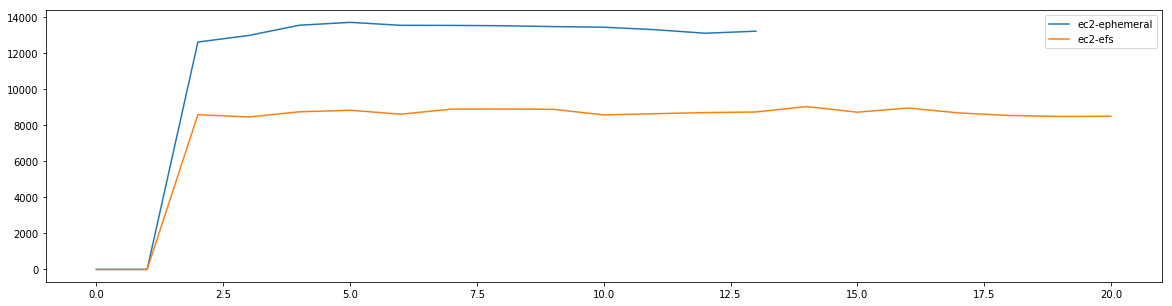

In [72]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)
metric_name = "inserts_per_sec"

for cluster, metrics in cluster_to_metrics.iteritems():
    print cluster
    ax.plot(metrics[metric_name])
ax.legend([c for c in cluster_to_metrics])
plt.show()